# **WhatKey**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


# **Importar librerias**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras

# Clasificando las imagenes

Para esta sección primero se leeran las imagenes con la libreria "CV2", seguido de esto se clasificaran las imagenes en numpy arrays, donde el primer array 'keys' es usado en los clasificadores y el array 'keysT' es usado en la red neuronal.

In [ ]:
keysC = np.zeros(shape=(184, 6000))
keysT = np.zeros(shape=(184, 100, 60))
for i in range(184):
  I = cv2.imread(f"keys recortadas/datakeys2/key ({i+1}).jpg", 0) 
  I = cv2.resize(I, (60,100))
  M = cv2.fastNlMeansDenoising(I)
  Ic = cv2.Canny(M, 50,100)
  keysT[i] = Ic
  Ic = np.reshape(Ic,(1,6000))
  keysC[i] = Ic

Seguido de esto creamos un array 'label' donde contendra las etiquetas de las llaves. Dicho array lo utilizaremos para la clasificacion de las llaves en el entreno de los clasificadores.

In [ ]:
labels = []
label = 0
for i in range(50):
  labels.append(label)

label += 1
for i in range(48):
  labels.append(label)

label += 1
for i in range(49):
  labels.append(label)

label += 1
for i in range(37):
  labels.append(label)

len(labels)

184

In [ ]:
X = keysC
y = np.array(labels)

Creamos los arrays con un 20% en el test y 80% en el train de os datos completos que utilizaremos en los clasificadores correspondientes para entrenarlos, los cuales seran los siguientes: Naive Gausean Bayes, Super Vector Classifier y Random Forest Classifier

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [ ]:
print( X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(147, 6000) (37, 6000)
(147,) (37,)


# **Clasificadores**

# Naive gaussian bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_Bayes = NB.predict(X_test)

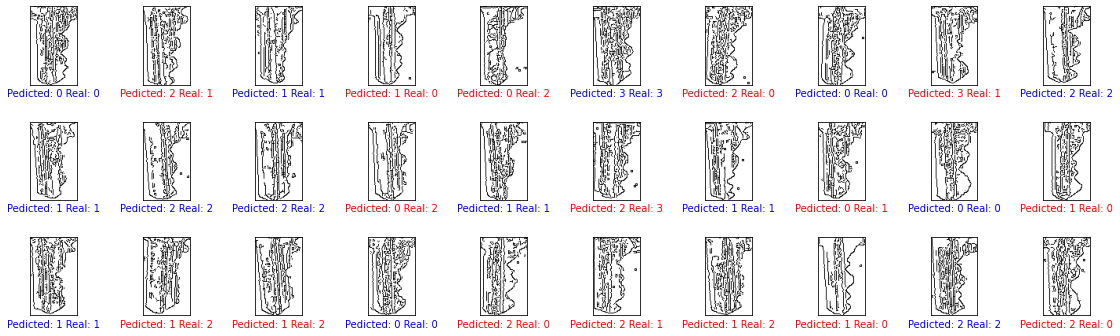

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_Bayes, y_test, X_test)

In [ ]:
print( "acierto en train", NB.score(X_train, y_train))
print( "acierto en test ", NB.score(X_test, y_test))

acierto en train 0.9659863945578231
acierto en test  0.5405405405405406


# Super Vector Classifier

In [ ]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
predictions_SVC = SVC_poly.predict(X_test)

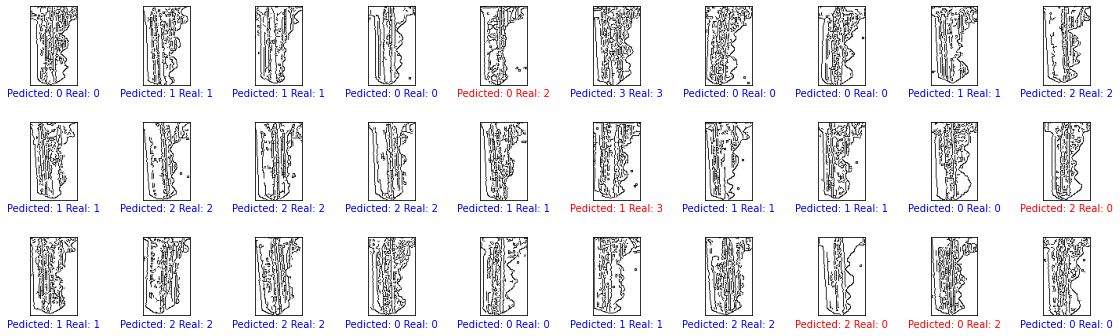

In [ ]:
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_SVC, y_test, X_test)

In [ ]:
print( "acierto en train", SVC_poly.score(X_train, y_train))
print( "acierto en test ", SVC_poly.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.8108108108108109


# Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RandomForest = RFC.predict(X_test)

<Figure size 432x288 with 0 Axes>

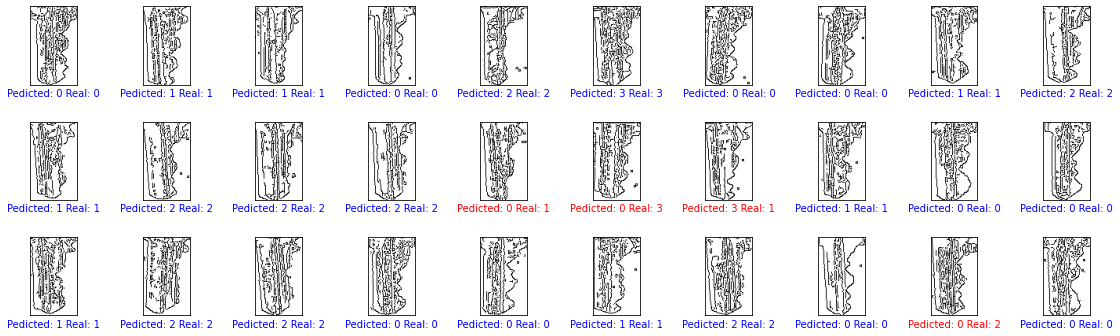

In [ ]:
%run Functions/dl_plot_clasificador2.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_RandomForest, y_test, X_test)

In [ ]:
print( "acierto en train", RFC.score(X_train, y_train))
print( "acierto en test ", RFC.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.8108108108108109


# Acierto en todo el array de imagenes por parte de los clasificadores

Naive Gausean Bayes

In [ ]:
s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.543 (+/- 0.06419)


Super Vector Classifier

In [ ]:
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.706 (+/- 0.13405)


Random Forest Classifier

In [ ]:
s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.690 (+/- 0.07095)


# **Deep Learning**

In [ ]:
X = keysT
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(147, 100, 60) (147,) (37, 100, 60) (37,)


In [ ]:
#@title *code* Para normalizar y preparar los datos
X_train = X_train.reshape([-1, 60, 100, 1])
X_test = X_test.reshape([-1, 60, 100, 1])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (147, 60, 100, 1)
Number of images in X_train 147
Number of images in X_test 37


In [ ]:
#@title *code* Creando la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[60, 100, 1]),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.tanh),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              6145024   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 6,834,564
Trainable params: 6,834,564
Non-trainable params: 0
____________________________________________

In [ ]:
#@title *code* Entrenando la red neuronal
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 36ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 36ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 37ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 35ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 36ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 36ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 37ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 38ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 36ms/step - loss: 0.0096 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 17ms/step - loss: 0.5048 - accuracy: 0.8649
Test accuracy: 0.8648648858070374


In [ ]:
predictions = model.predict(X_test)

<Figure size 432x288 with 0 Axes>

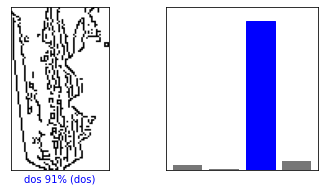

In [ ]:
%run Functions/dl_plot2.py
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

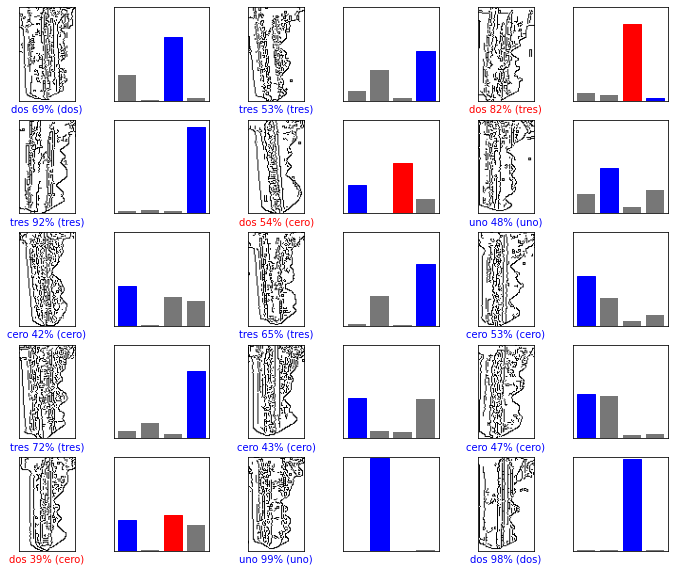

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot2.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

# **Conclusiones**



*   A pesar de lograr una precisión mucho mayor que la obtenida con las imagenes completas bordeadas, aún queda muy por detras de su compañera sin bordes.

